## NLP 简明实用课程
1. 搭建环境，虚拟环境，装包
2. 文本预处理：中文预处理，英文预处理
3. 词频分析
4. 词云图可视化（设置云的形状）
5. 命名体识别（举例子：识别红楼梦中的人物关系）

In [ ]:
# 终端运行，搭建虚拟环境
# conda create -n nlp python==3.10
# conda activate nlp

In [ ]:
## 安装依赖库
!pip install -r requirments.txt   


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 6.4 MB/s eta 0:00:00a 0:00:01m
  Preparing metadata (setup.py) ... done
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.27.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 8.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 10.3 MB/s eta 0:00:00a 0:00:01
   ━

## 分词
自然语言分词（Tokenization）是自然语言处理（NLP）中的一个基础任务，指的是将连续的文本分割成有意义的单元（通常是词语或符号）。
分词是文本预处理的重要步骤，因为大多数NLP任务（如词频分析、文本分类、机器翻译等）都需要以词语为单位进行处理。

* 示例：
1. 中文：“我爱自然语言处理” → “我/爱/自然语言/处理”。
2. 英文："I love NLP!" → ["I", "love", "NLP", "!"]。

## 中文分词 Jieba 库
`Jieba` 是一个用于中文分词的 Python 库，广泛应用于中文自然语言处理（NLP）任务。它支持精确模式、全模式和搜索引擎模式等多种分词模式，并提供了关键词提取、词性标注等功能。

In [7]:
import jieba
# 示例中文文本
zh_text = "自然语言处理是人工智能领域的一个重要方向。"
# 使用jieba进行分词
# 精确模式
words = jieba.cut(zh_text, cut_all=False)
print("精确模式: " + "/ ".join(words))

# 全模式 将文本中所有可能的词语都扫描出来
words = jieba.cut(zh_text, cut_all=True)
print("全模式: " + "/ ".join(words))

# 自定义词典
jieba.add_word("自然语言处理")
words = jieba.cut(zh_text)
print("自定义词典: " + "/ ".join(words))


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jv/5rl0pkxn3sv1j_1fj9pf6xhm0000gn/T/jieba.cache
Loading model cost 0.346 seconds.
Prefix dict has been built successfully.


精确模式: 自然语言/ 处理/ 是/ 人工智能/ 领域/ 的/ 一个/ 重要/ 方向/ 。
全模式: 自然/ 自然语言/ 语言/ 处理/ 是/ 人工/ 人工智能/ 智能/ 领域/ 的/ 一个/ 重要/ 方向/ 。
自定义词典: 自然语言处理/ 是/ 人工智能/ 领域/ 的/ 一个/ 重要/ 方向/ 。


# NLTK 库介绍

`NLTK`（Natural Language Toolkit）是一个用于自然语言处理（NLP）的 Python 库，提供了丰富的工具和资源，适用于文本处理、分析和研究。

## 主要功能

### 1. 文本处理
- **分词**：将文本切分为单词或句子。
  - 示例：`nltk.word_tokenize("Hello, world!")`
  - 结果：`['Hello', ',', 'world', '!']`
- **词干提取**：将单词还原为词干形式。
  - 示例：`nltk.PorterStemmer().stem("running")`
  - 结果：`'run'`
- **词形还原**：将单词还原为词典形式。
  - 示例：`nltk.WordNetLemmatizer().lemmatize("running", pos='v')`
  - 结果：`'run'`

### 2. 词性标注
- 为单词标注词性。
  - 示例：`nltk.pos_tag(nltk.word_tokenize("Hello, world!"))`
  - 结果：`[('Hello', 'NNP'), (',', ','), ('world', 'NN'), ('!', '.')]`

### 3. 命名实体识别
- 识别文本中的命名实体（如人名、地名）。
  - 示例：`nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize("John lives in New York.")))`
  - 结果：`(S (PERSON John/NNP) lives/VBZ in/IN (GPE New/NNP York/NNP) ./.)`


In [ ]:
import nltk
# 下载英文分词器
#nltk.download('punkt',download_dir="nltk_data") # 用于分词
#nltk.download('punkt_tab',download_dir="nltk_data") # 用于词性标注
# nltk.download('nltk_data',download_dir='nltk_data') # 用于词性标注
# nltk.download('wordnet',download_dir='nltk_data') # 用于词形还原
# nltk.download('stopwords',download_dir='nltk_data') # 用于停用词
if "nltk_data" not in  nltk.data.path:
    nltk.data.path.append('nltk_data')


In [ ]:
# 英文分词
en_text = "Natural Language Processing is an important field in Artificial Intelligence."
# 使用nltk进行分词，将文本切分为单词或句子。
words = nltk.word_tokenize(en_text)
print("英文分词结果:", words)

英文分词结果: ['Natural', 'Language', 'Processing', 'is', 'an', 'important', 'field', 'in', 'Artificial', 'Intelligence', '.']


In [10]:
##停用词是什么？
# 停用词（stop words）是指在自然语言处理中，不需要关注或考虑的词，如“the”，“and”，“in”，“of”等。
# 如“的”、“是”、“在”、“了”（中文）、“the”、“and”、“is”、“to”等（英文）。去除停用词可以显著提高文本处理的效率和效果。

##中文停用词表
stop_words = set([line.strip() for line in open('中文stoplist.txt', 'r', encoding='utf-8').readlines()])
# 去除停用词
words = jieba.lcut(zh_text)
print("中文分词后结果 :", words)
zh_filtered_tokens = [token for token in words if token not in stop_words]
print("中文去除停用词 :", zh_filtered_tokens)


中文分词后结果 : ['自然语言处理', '是', '人工智能', '领域', '的', '一个', '重要', '方向', '。']
中文去除停用词 : ['自然语言处理', '人工智能', '领域', '重要', '方向']


In [ ]:
##英文停用词表
from nltk.corpus import stopwords
# 使用nltk进行英文分词
tokens = nltk.word_tokenize(en_text.lower()) # 分词 小写
print("英文分词后结果:", tokens)
# 加载英文停用词
stop_words = set(stopwords.words('english'))
# 去除停用词
en_filtered_tokens = [token for token in tokens if token not in stop_words]
print("英文去除停用词:", en_filtered_tokens)

英文分词后结果: ['natural', 'language', 'processing', 'is', 'an', 'important', 'field', 'in', 'artificial', 'intelligence', '.']
英文去除停用词: ['natural', 'language', 'processing', 'important', 'field', 'artificial', 'intelligence', '.']


In [14]:
# 其他中文常见数据预处理
result=[token for token in zh_filtered_tokens if token.isalpha()] #排除滤掉标点符号和数字
result=[token for token in result if all(map(lambda c:'\u4e00' <= c <= '\u9fa5',token))]  #排除非中文
result = [token for token in result if len(token)>1] # 根据长度排除短词
result


['自然语言处理', '人工智能', '领域', '重要', '方向']

## 词性还原的作用

### 1. **规范化文本**
   - **作用**：将不同形式的单词还原为统一的标准形式。
   - **示例**：
     - 输入：`"running", "ran", "runs"`
     - 还原结果：`"run"`
   - **意义**：减少词汇的多样性，便于后续的文本分析。

---

### 2. **提高文本分析的准确性**
   - **作用**：通过还原单词的词典形式，避免因单词形式不同而导致的误解。
   - **示例**：
     - 输入：`"better"`
     - 还原结果：`"good"`（如果词性为形容词）。
   - **意义**：确保分析结果更加准确，尤其是在情感分析、文本分类等任务中。

---

### 3. **支持词性标注**
   - **作用**：词性还原通常需要结合词性标注（POS tagging），因为同一个单词在不同上下文中可能有不同的词性和词元。
   - **示例**：
     - 输入：`"saw"`
     - 还原结果：
       - 如果词性是动词：`"see"`
       - 如果词性是名词：`"saw"`
   - **意义**：提高词性标注和词形还原的准确性。


In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize

# 定义函数：将 NLTK 词性标签转换为 WordNet 词性标签
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# 示例文本
text = "Tom is running in a race and feeling better than ever."

# 分词
words = word_tokenize(text)

# 词性标注
tagged_words = pos_tag(words)

# 词性还原
lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for word, tag in tagged_words:
    wordnet_pos = get_wordnet_pos(tag)
    lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
    lemmatized_words.append(lemma)

# 输出结果
print("原始文本:", text)
print("分词结果:", words)
print("词性标注结果:", tagged_words)
print("词形还原结果:", lemmatized_words)

原始文本: Tom is running in a race and feeling better than ever.
分词结果: ['Tom', 'is', 'running', 'in', 'a', 'race', 'and', 'feeling', 'better', 'than', 'ever', '.']
词性标注结果: [('Tom', 'NNP'), ('is', 'VBZ'), ('running', 'VBG'), ('in', 'IN'), ('a', 'DT'), ('race', 'NN'), ('and', 'CC'), ('feeling', 'VBG'), ('better', 'RBR'), ('than', 'IN'), ('ever', 'RB'), ('.', '.')]
词形还原结果: ['Tom', 'be', 'run', 'in', 'a', 'race', 'and', 'feel', 'well', 'than', 'ever', '.']


In [16]:
# 中文预处理整合
def chinese_preprocess(text):
    # 使用jieba进行中文分词
    words = jieba.lcut(text)
    # 加载中文停用词
    stop_words = set([line.strip() for line in open('中文stoplist.txt', 'r', encoding='utf-8').readlines()])
    # 去除停用词
    result = [word for word in words if word not in stop_words]
    result = [word for word in words if word.isalpha()] #排除标点和数字
    #result=[token for token in result if not token.isnumeric()] #排除数字
    result=[token for token in result if all(map(lambda c:'\u4e00' <= c <= '\u9fa5',token))]  #排除非中文
    result = [token for token in result if len(token)>1] # 根据长度排除短词
    return result

# 进行中文预处理
zh_text="自然语言处理是人工智能领域的一个重要方向。112323,asada"
chinese_result = chinese_preprocess(zh_text)
print("中文原始文档:",zh_text)
print("中文预处理结果:", chinese_result)
print("\n")


中文原始文档: 自然语言处理是人工智能领域的一个重要方向。112323,asada
中文预处理结果: ['自然语言处理', '人工智能', '领域', '一个', '重要', '方向']




In [19]:

# 英文预处理整合
def english_preprocess(text):
    lower = text.lower() #大小写转换
    tokens = nltk.word_tokenize(lower) #分词
    without_stopwords = [w for w in tokens if not w in stopwords.words('english')] #去除停用词
    without_stopwords = [word for word in without_stopwords if word.isalpha()] #排除标点和数字
    #词形还原
    tagged_sent = pos_tag(without_stopwords)
    lemmatizer = WordNetLemmatizer()
    lemmas_sent = []
    for tag in tagged_sent:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmas_sent.append(lemmatizer.lemmatize(tag[0], pos=wordnet_pos)) # 词形还原
    cleaned_text = lemmas_sent
    return cleaned_text

# 进行英文预处理
en_text = "Natural Language Processing is an important field in Artificial Intelligence."
english_result = english_preprocess(en_text)
print("英文原始文档:",en_text)
print("英文预处理结果:", english_result)

英文原始文档: Natural Language Processing is an important field in Artificial Intelligence.
英文预处理结果: ['natural', 'language', 'processing', 'important', 'field', 'artificial', 'intelligence']


In [ ]:
## 词频分析
from collections import Counter
import pandas as pd
def word_frequency_analysis(words, save_path=None):
    # 统计词频
    word_freq = Counter(words)
    if save_path:
        # 保存结果到文件
        df = pd.DataFrame({
        'Word': list(word_freq.keys()),
        'Frequency': list(word_freq.values())
    })
        df = df.sort_values(by='Frequency', ascending=False) # 按频率排序
        df.to_excel(save_path, index=False) # 保存到Excel文件
    return word_freq

# 对中文预处理结果进行词频分析
zh_text="自然语言处理是人工智能领域的一个重要方向。112323,asada"
chinese_result = chinese_preprocess(zh_text)
chinese_freq = word_frequency_analysis(chinese_result)
print("中文词频分析结果:", chinese_freq)

# 对英文预处理结果进行词频分析
en_text = "Natural Language Processing is an important field in Artificial Intelligence."
english_result = english_preprocess(en_text)
save_path=None #'english_freq.xlsx'
english_freq = word_frequency_analysis(english_result,save_path)
print("英文词频分析结果:", english_freq)

中文词频分析结果: Counter({'自然语言处理': 1, '人工智能': 1, '领域': 1, '一个': 1, '重要': 1, '方向': 1})
英文词频分析结果: Counter({'natural': 1, 'language': 1, 'processing': 1, 'important': 1, 'field': 1, 'artificial': 1, 'intelligence': 1})


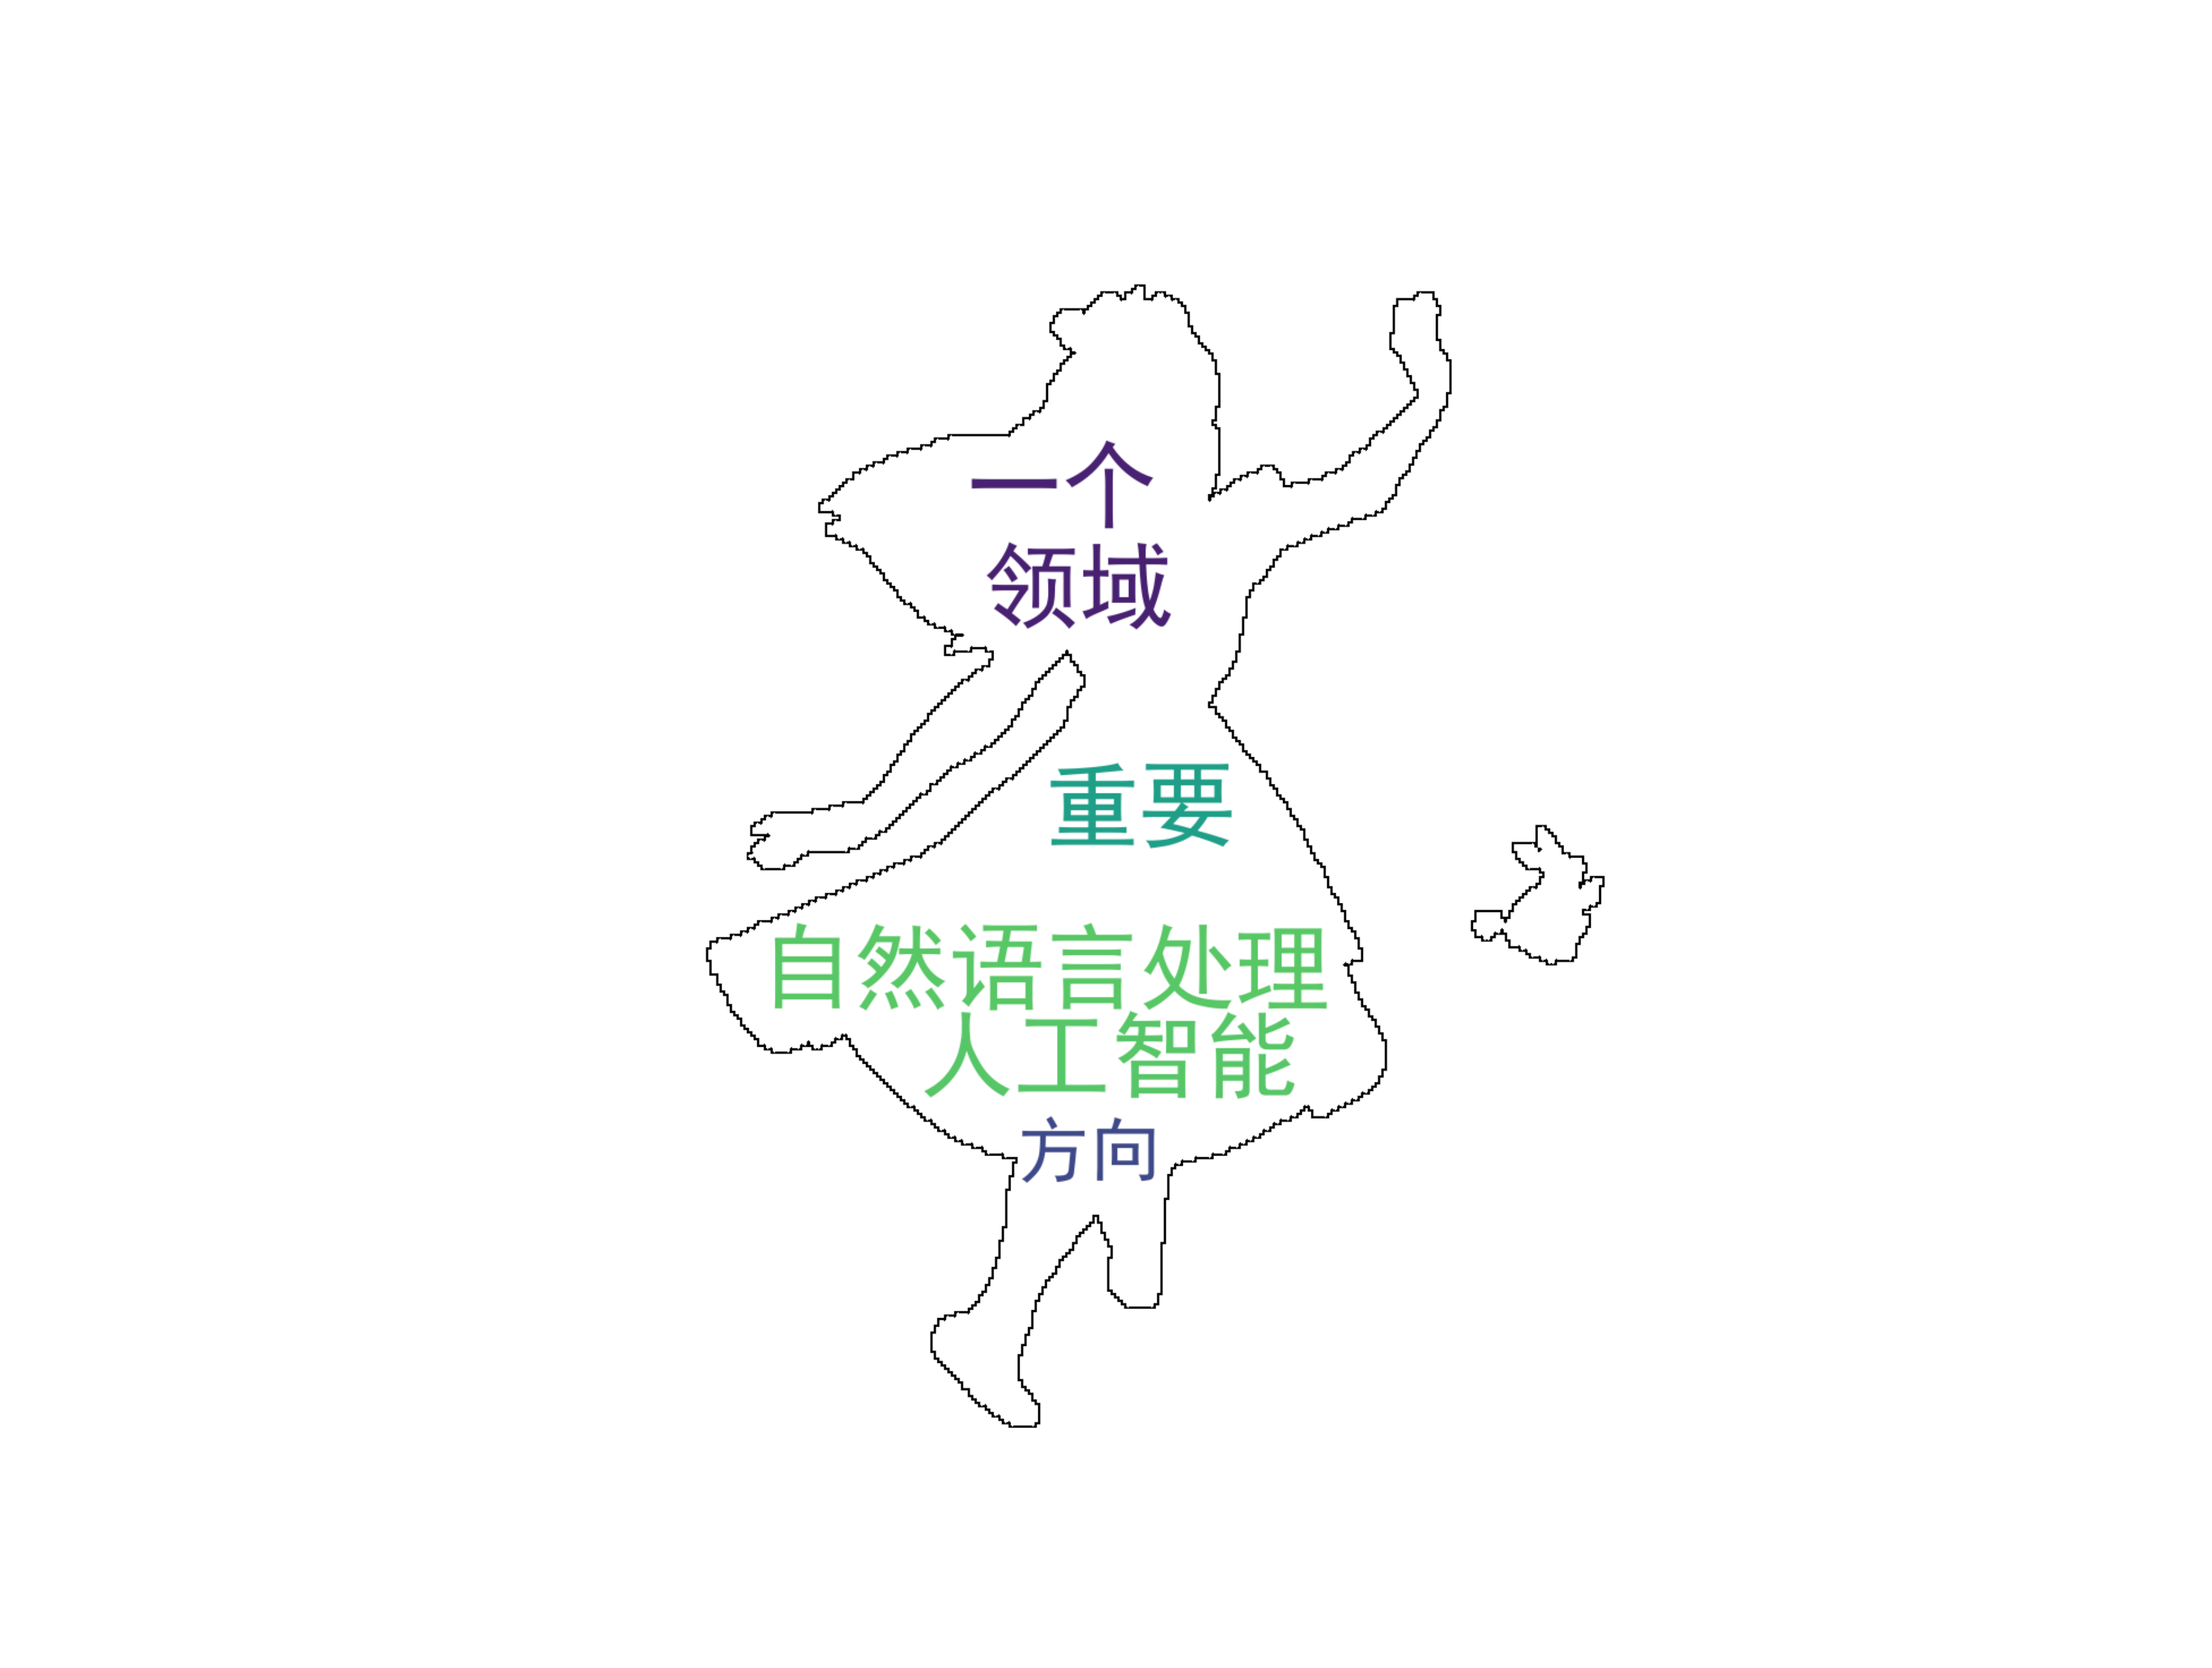

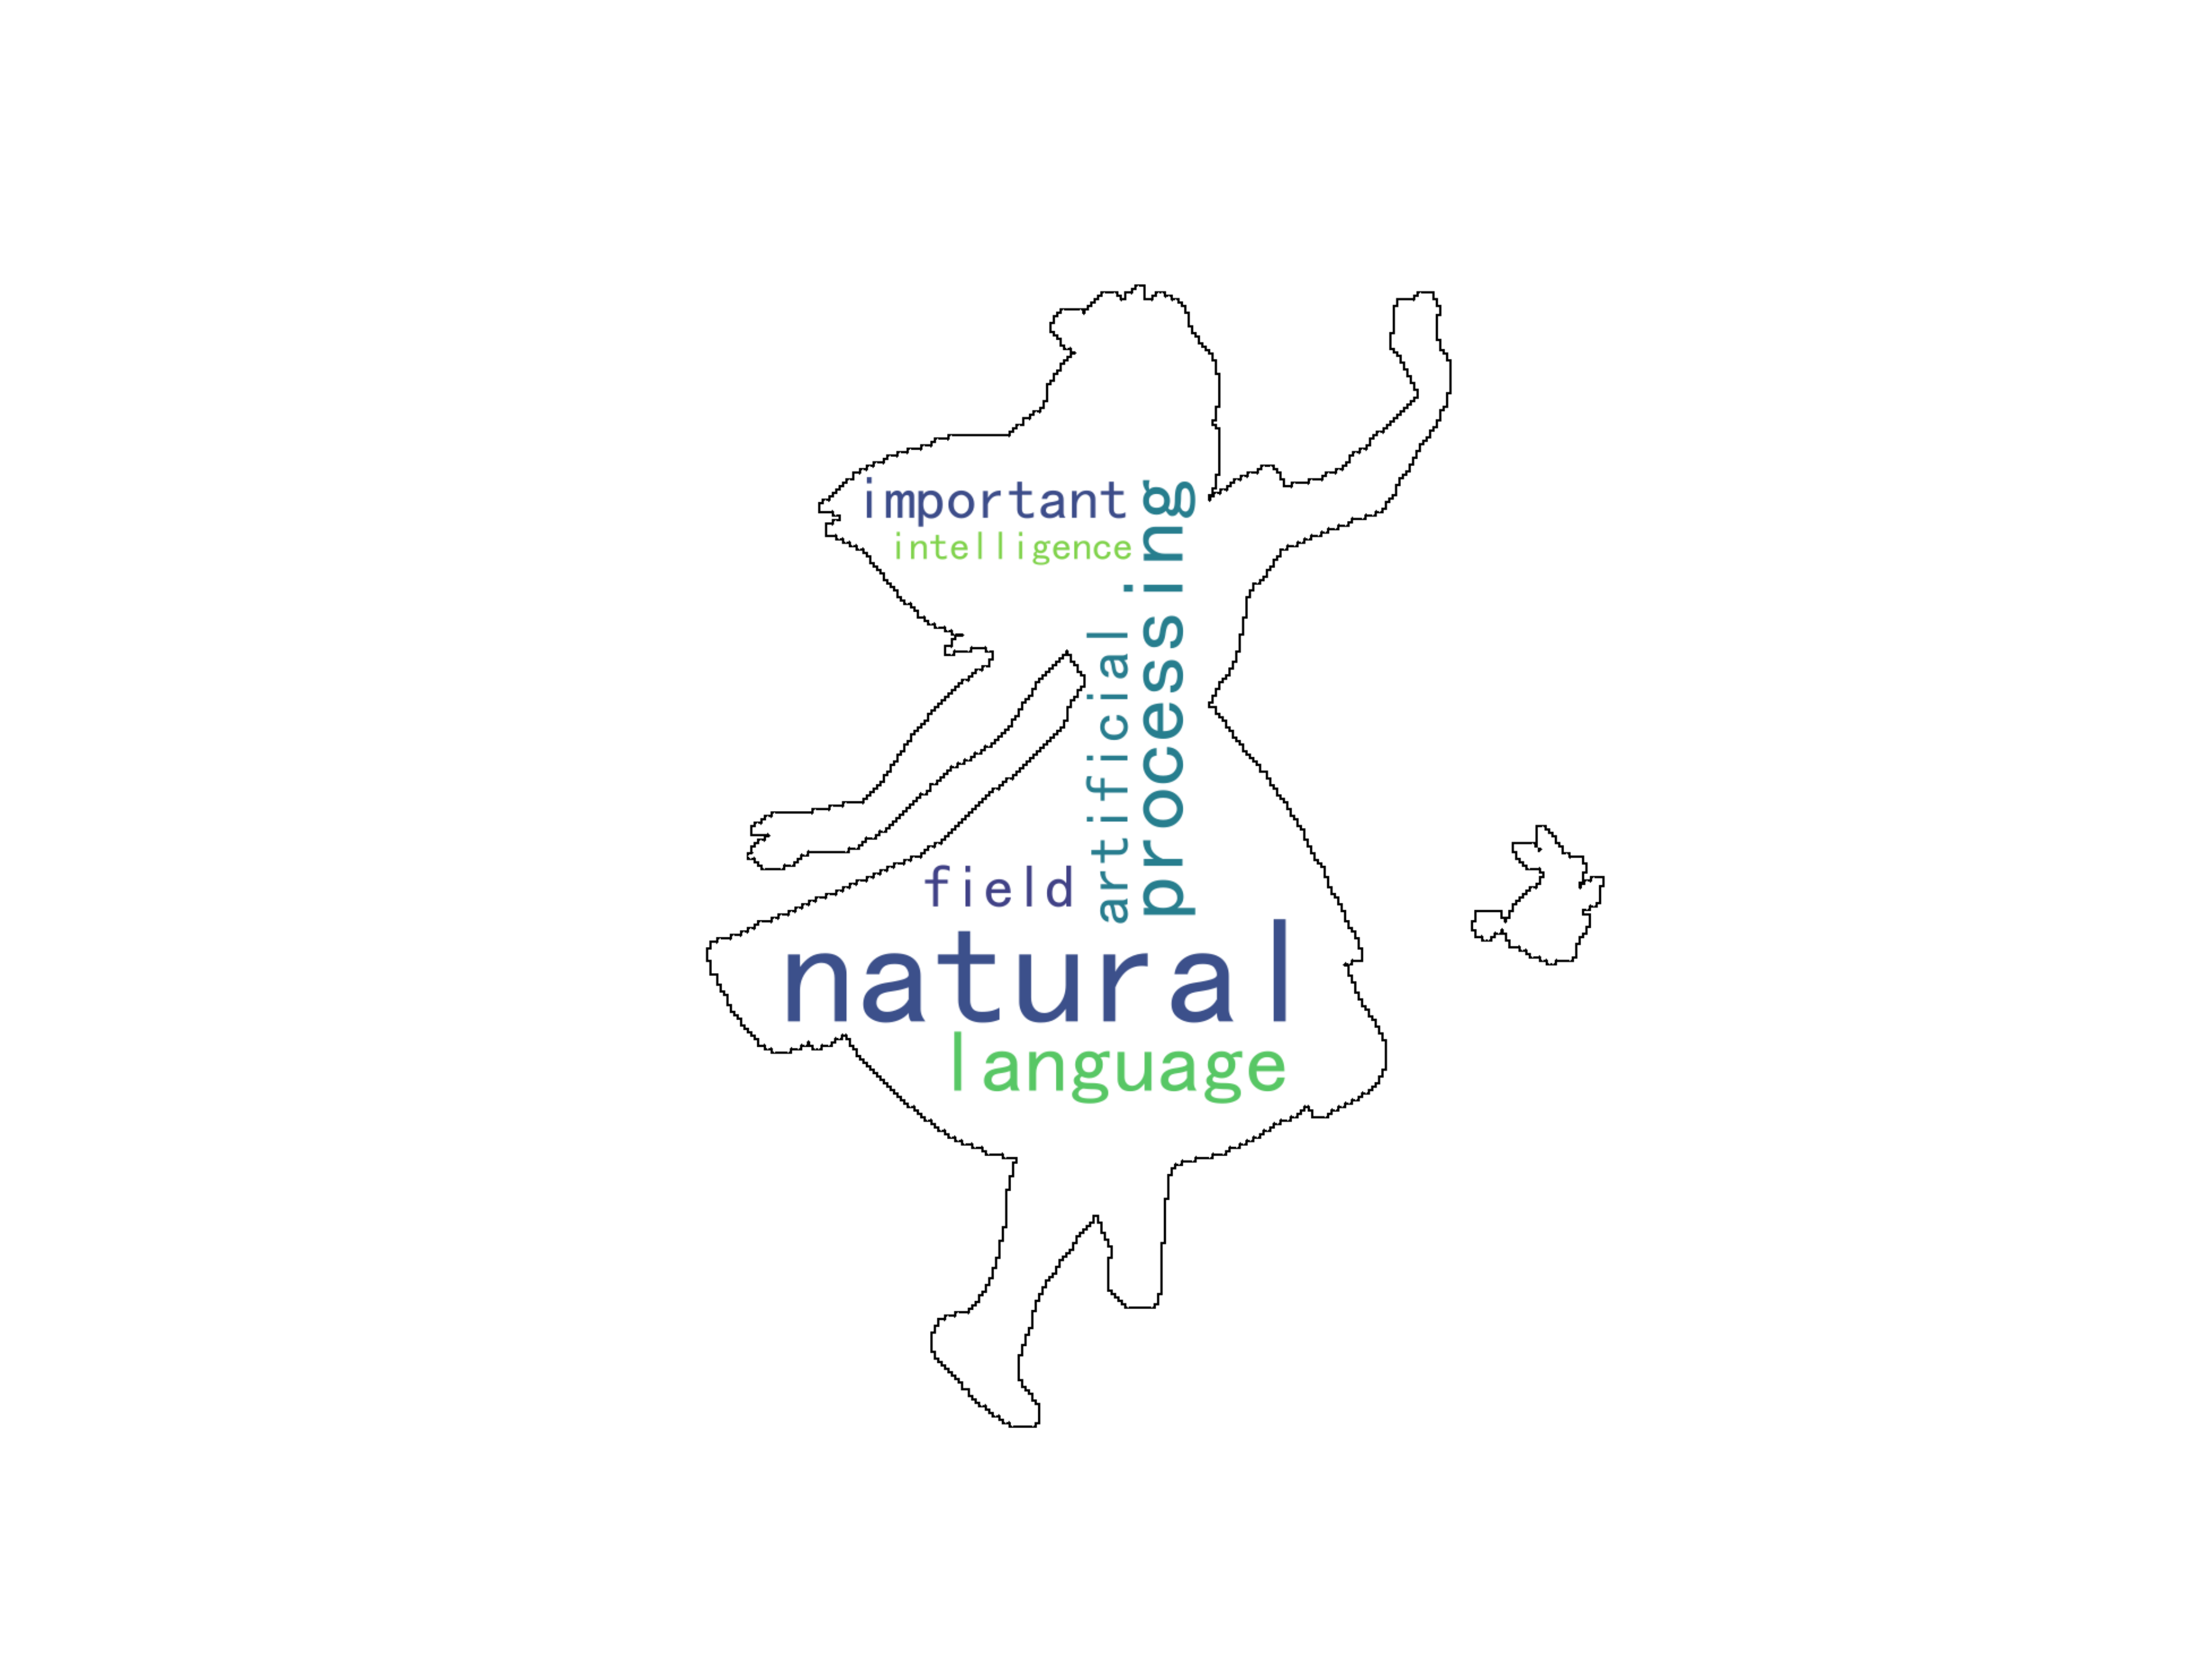

In [72]:
# 3. 词云图可视化（设置云的形状）
"""
词云图（Word Cloud）是一种数据可视化工具，用于展示文本数据中词语的频率分布。
它将文本中出现频率较高的词语以较大的字体显示，频率较低的词语以较小的字体显示，从而直观地反映文本的关键词和主题。
"""
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import PIL.Image as Image

def generate_wordcloud(word_freq, mask_path):
    # 读取词云形状图片
    mask_image = np.array(Image.open(mask_path))
    
    # 创建词云对象（增加清晰度的参数）
    wc = WordCloud(
        font_path='resource/simhei.ttf',
        background_color='white',
        mask=mask_image,          # 设置词云形状
        max_words=2000,           # 增加最大词数
        max_font_size=150,        # 增加最大字体大小
        min_font_size=2,          # 设置最小字体大小
        random_state=42,          # 固定随机状态使结果可复现
        contour_width=1,          # 添加轮廓线
        contour_color='black',    # 轮廓线颜色
        width=600,                # 增加宽度
        height=600,               # 增加高度
        scale=3,                  # 缩放因子，提高分辨率
        prefer_horizontal=0.7     # 90%的词水平显示
    )
    
    # 生成词云
    wc.generate_from_frequencies(word_freq)
    
    # 显示词云（增加图像质量）
    plt.figure(figsize=(12, 12), dpi=300)  # 增加图像尺寸和DPI
    plt.imshow(wc, interpolation='bilinear') #
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('wordcloud.png', dpi=300)
    plt.show()
    
    # 可选：保存高清词云图
    # wc.to_file('high_quality_wordcloud.png')

# 示例：生成中文词云
# 设置词云形状：通过给定的形状图片，可以生成有形状的词云。
generate_wordcloud(chinese_freq, 'resource/zh_mask.png')

# 设置词云形状：通过给定的形状图片，可以生成有形状的词云。
generate_wordcloud(english_freq, 'resource/zh_mask.png')

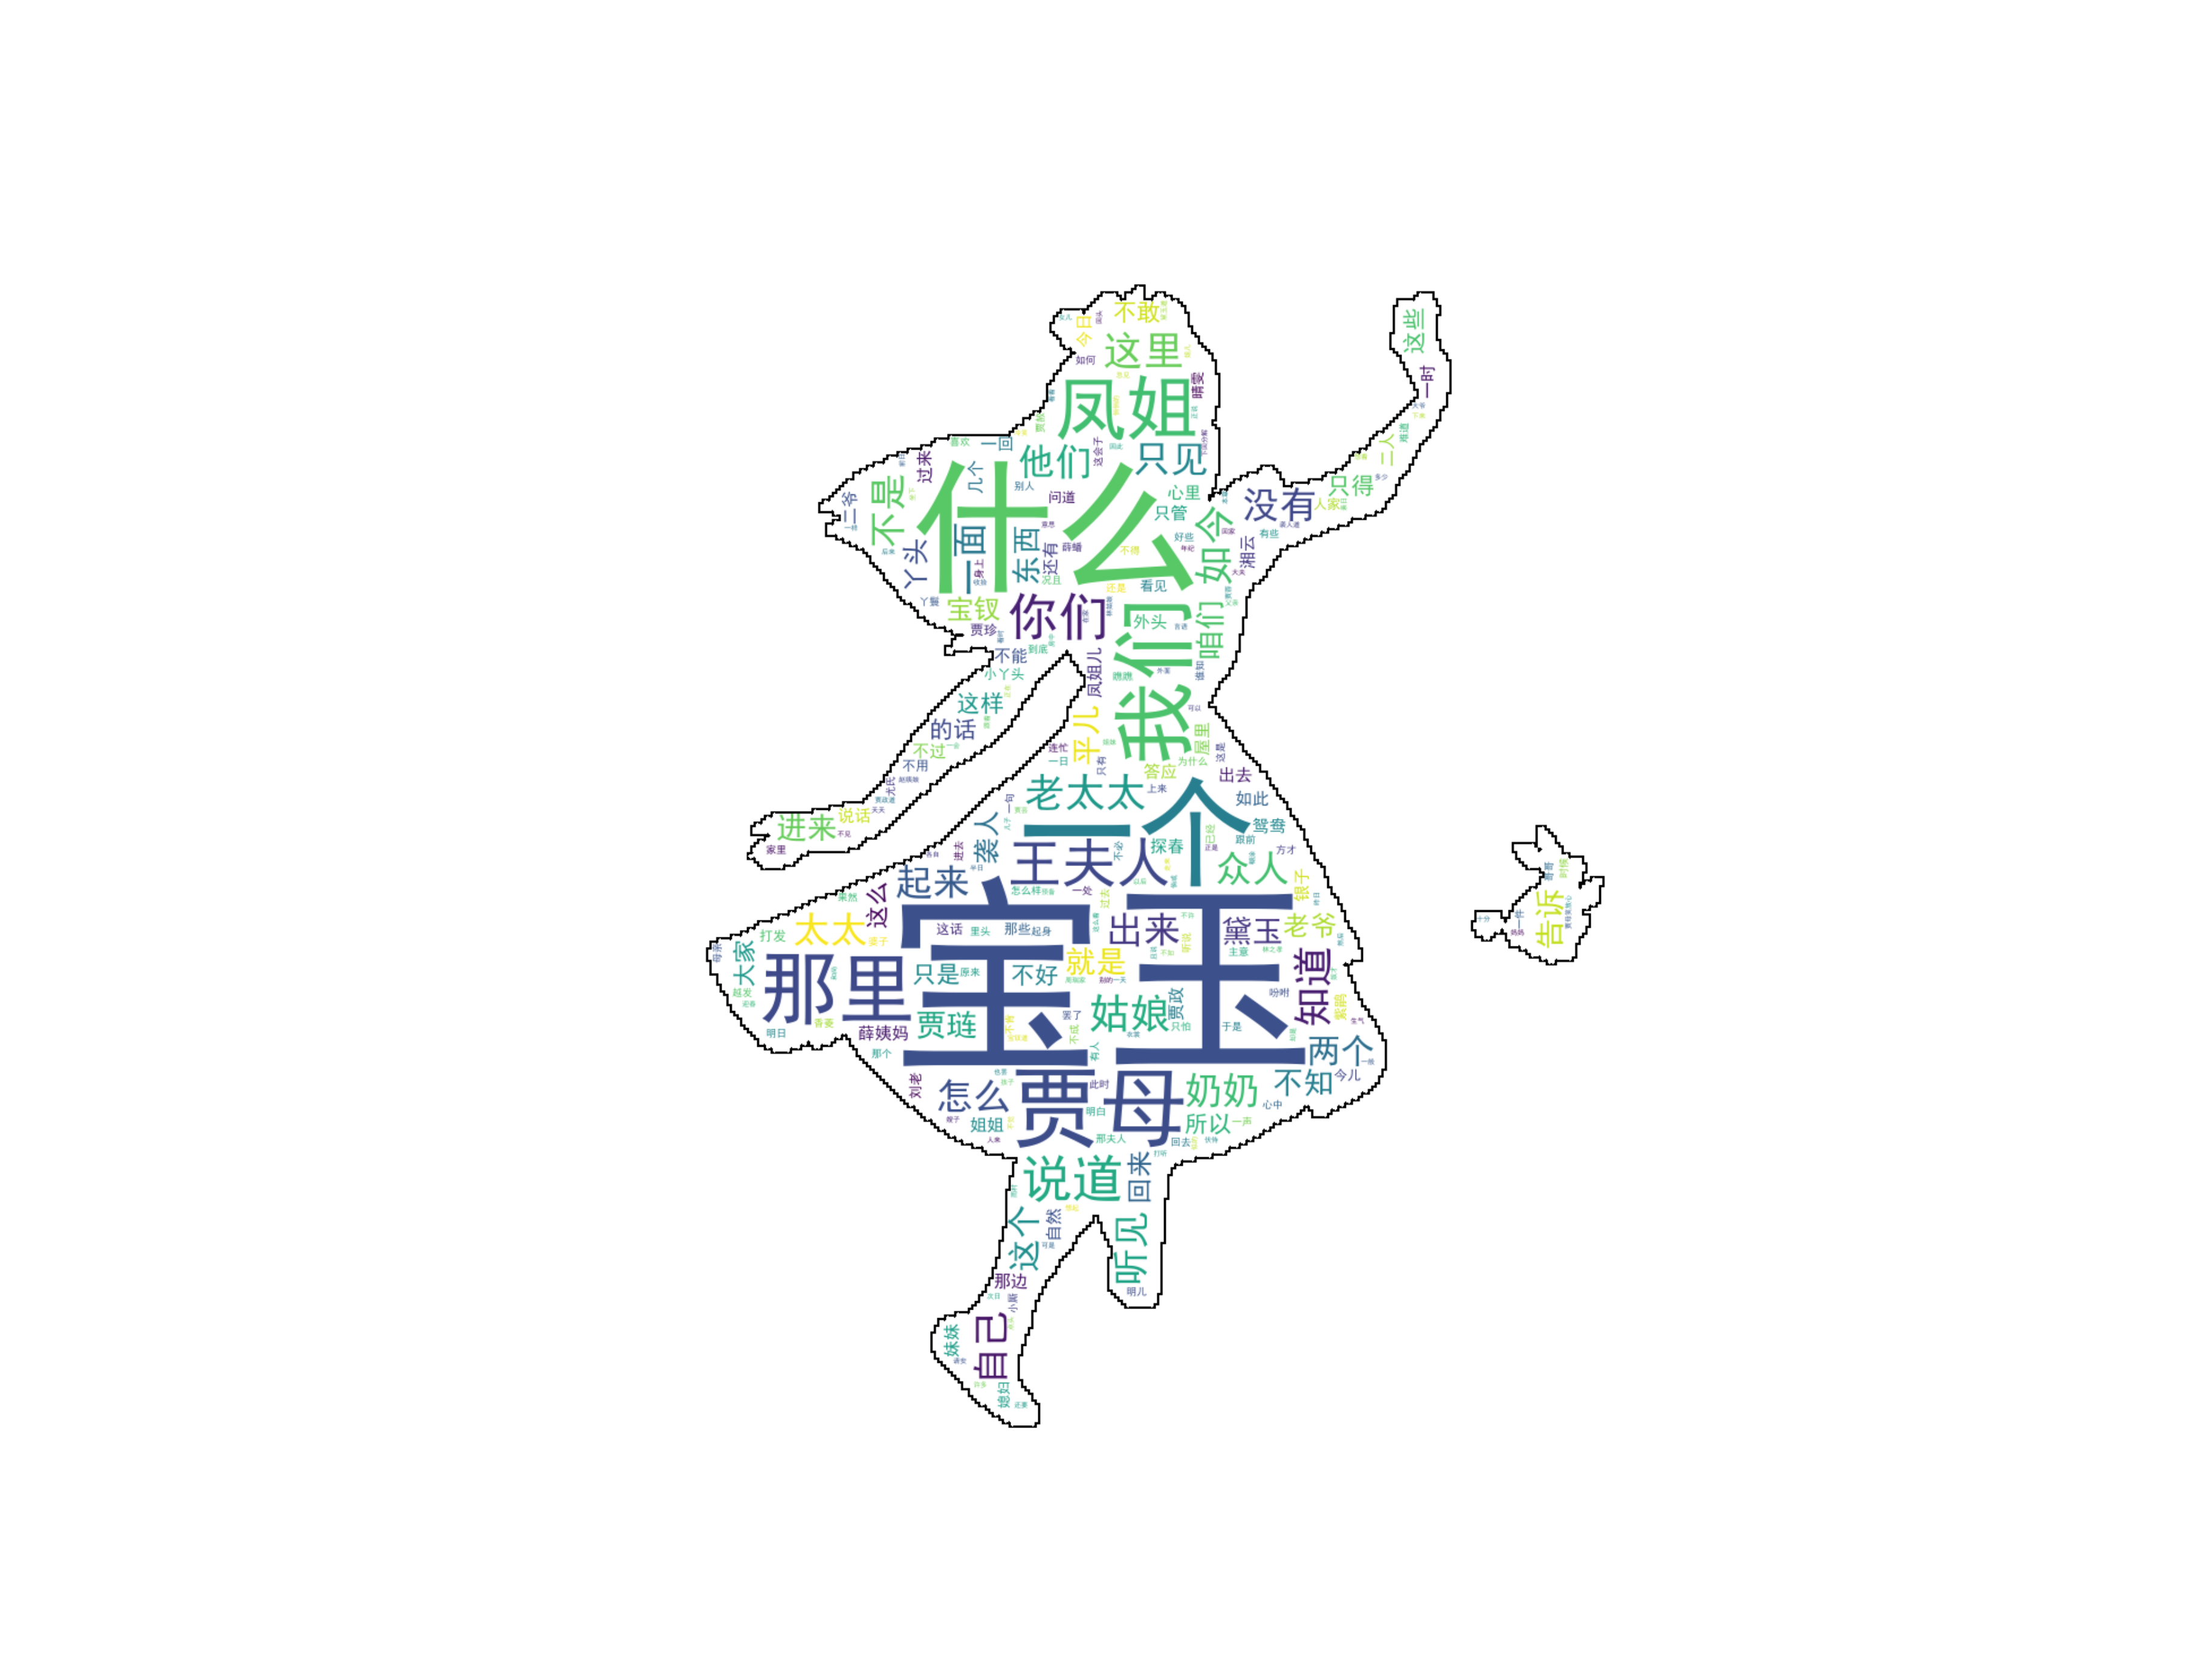

In [79]:
## 红楼梦的词云分析
import re 
def read_hongloumeng(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

file_path = "resource/红楼梦.txt"
hongloumeng_text = read_hongloumeng(file_path) # 读取文本
hongloumeng_text = chinese_preprocess(hongloumeng_text) # 中文预处理
save_path='hlm_fre.xlsx' #'english_freq.xlsx'
hongloumeng_freq = word_frequency_analysis(hongloumeng_text,save_path) # 词频分析
generate_wordcloud(hongloumeng_freq, 'resource/zh_mask.png') # 生成词云

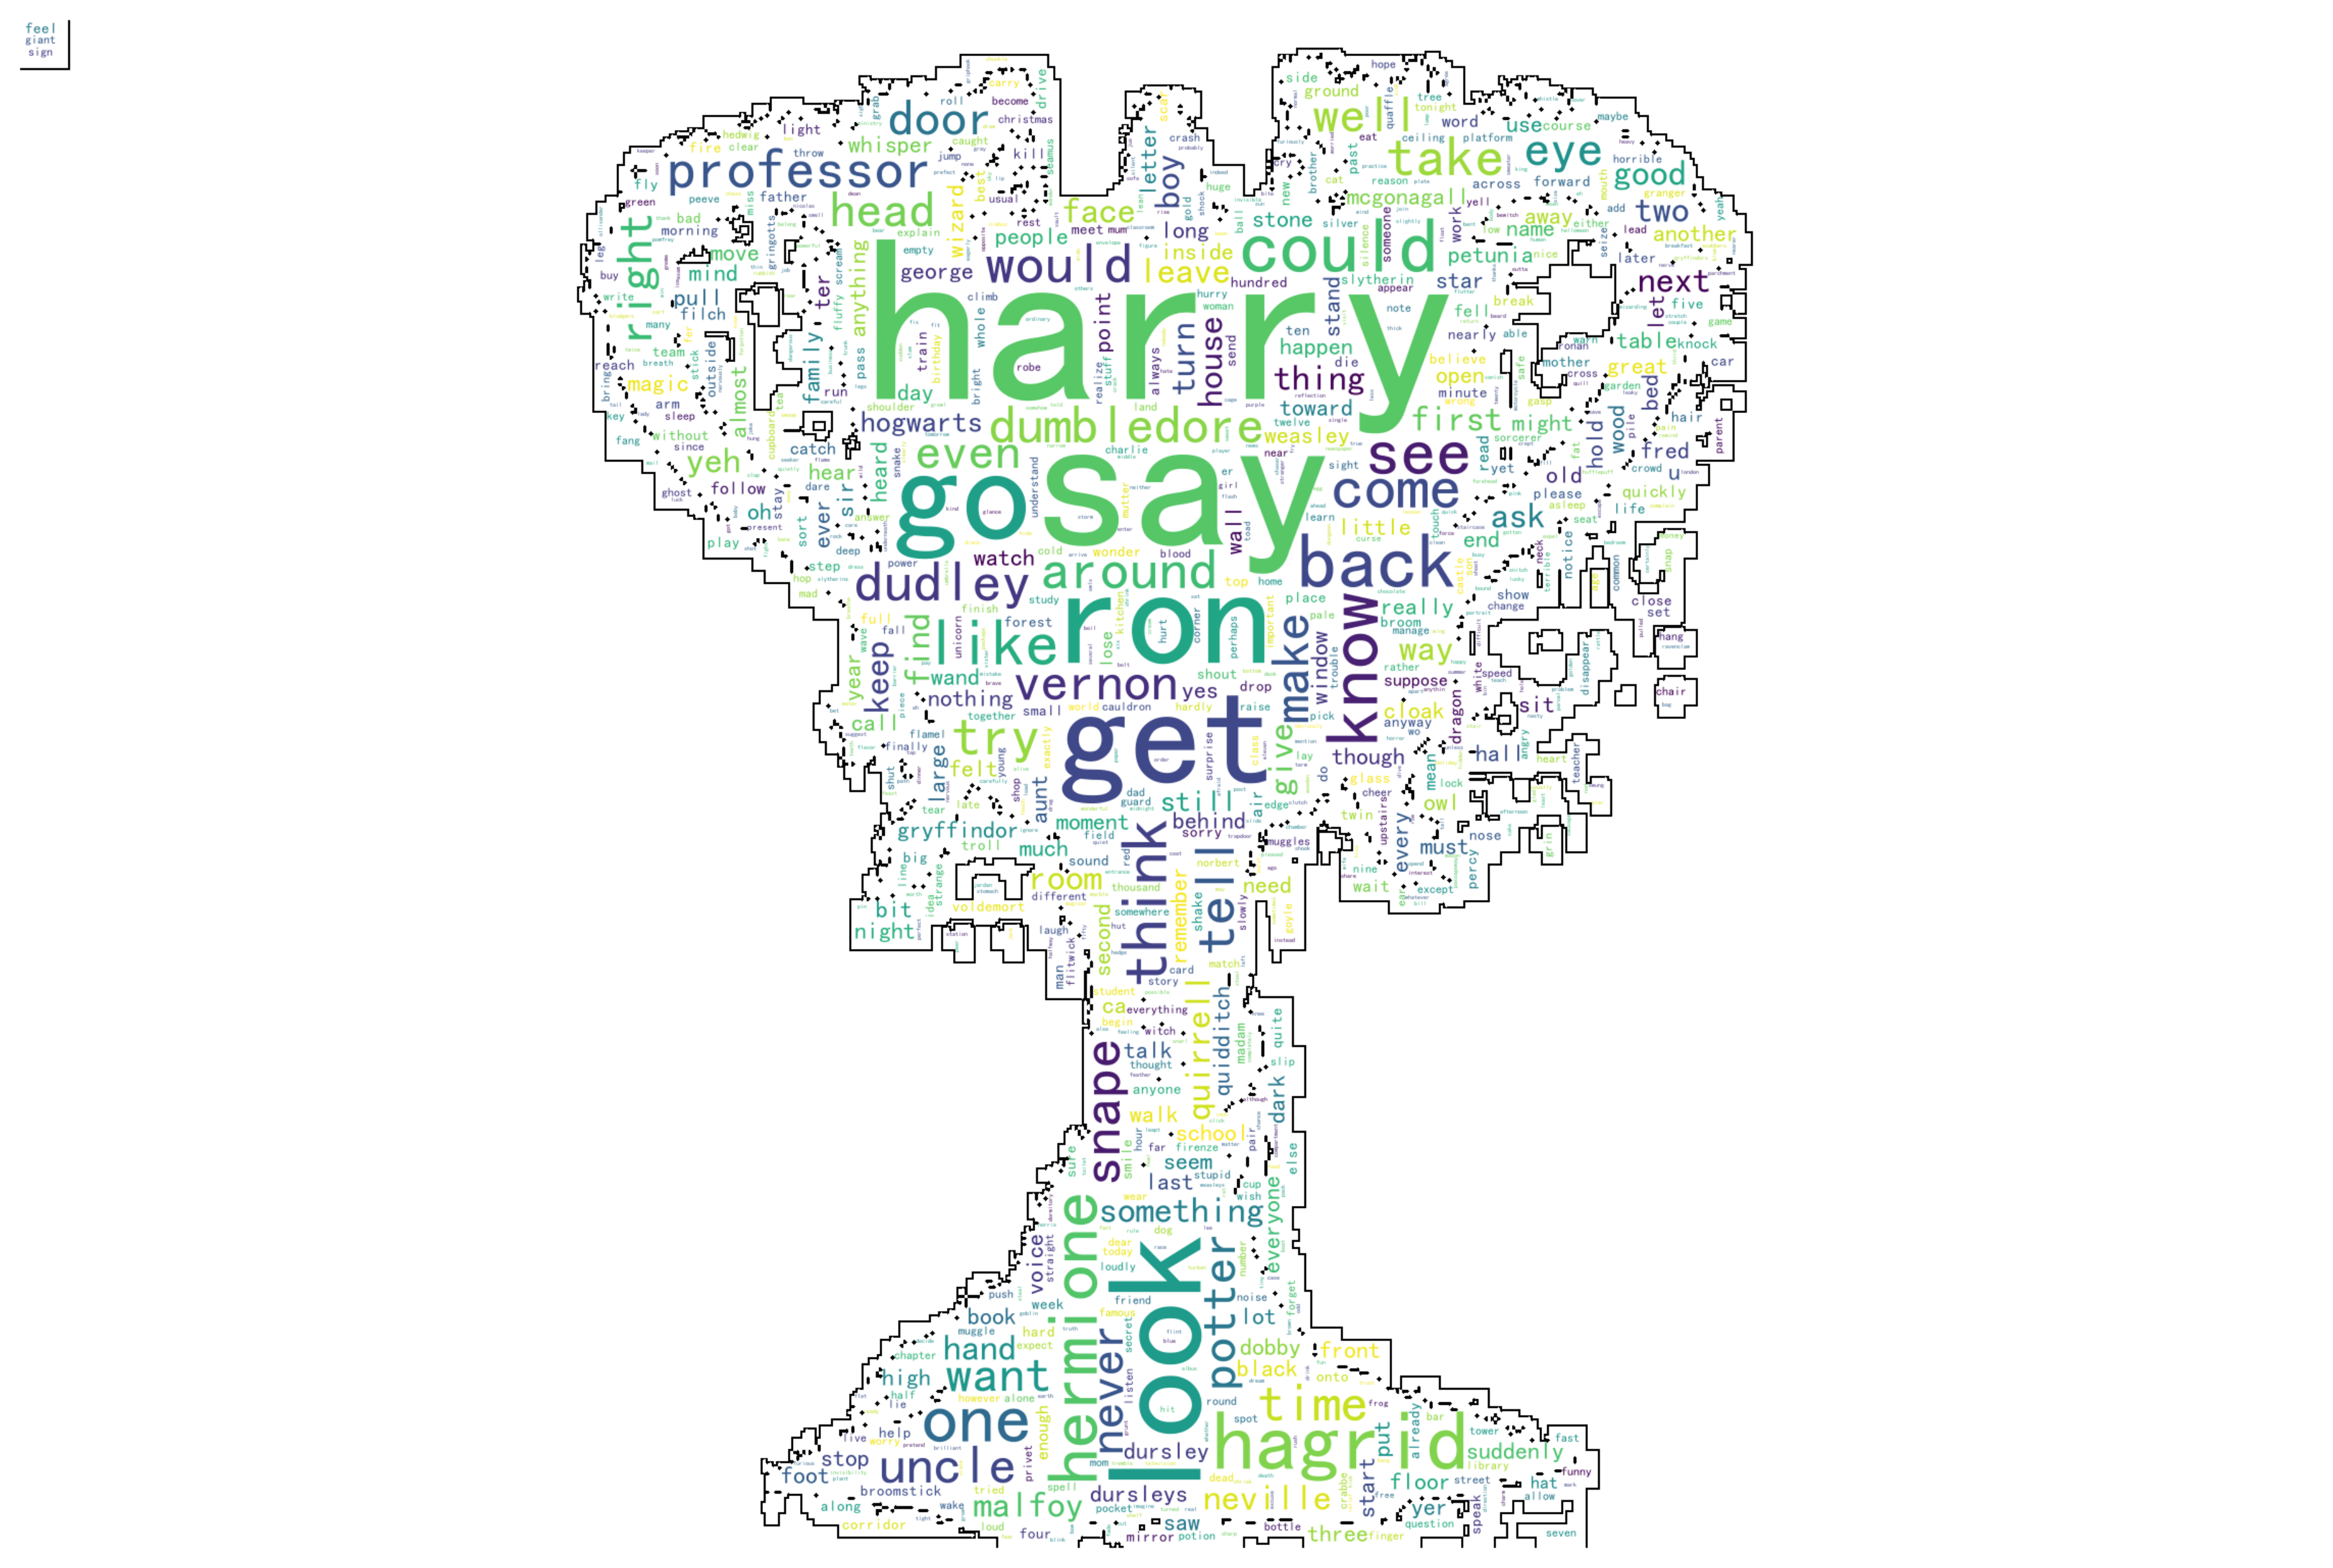

In [67]:
## 哈利波特1-7部词云图
def read_text(file_path):
    f=open(file_path,'r',encoding='gbk')
    text=f.read()
    return text


file_path = "resource/哈利波特1-7英文原版.txt"
text = read_text(file_path)[0:500000]#数量太大，只读取前50w个字符
text = english_preprocess(text)
text = word_frequency_analysis(text) # 词频分析
generate_wordcloud(text, 'resource/哈利波特.png') # 生成词云

## 命名实体识别（NER）的实现方法

命名实体识别（Named Entity Recognition，NER）是自然语言处理（NLP）中的一项重要任务，旨在从文本中识别出具有特定意义的实体，如**人名、地名、组织名、日期**等。以下是实现命名实体识别的常见方法：
**使用现有工具库**
   - **原理**：直接调用成熟的 NLP 工具库（如 NLTK、spaCy、StanfordNLP）进行命名实体识别。
   - **优点**：
     - 简单易用，适合快速实现。
   - **缺点**：
     - 可能无法完全适应特定领域的需求。



In [ ]:

## 中文命名体识别
import spacy
#下载命名实体识别模型
# !python -m spacy download en_core_web_sm # 英文
# !python -m spacy download zh_core_web_sm # 中文
!conda install -c conda-forge spacy-pkuseg
!pip install whl/en_core_web_sm-3.8.0-py3-none-any.whl
!pip install whl/zh_core_web_sm-3.8.0-py3-none-any.whl

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
- DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS co

In [54]:
# 加载中文预训练模型
nlp_zh = spacy.load("zh_core_web_sm") 
# 输入文本
text = "2024年3月，埃隆·马斯克（Elon Musk）在北京会见了中国政府官员，讨论在上海超级工厂的扩张计划。"
text = "林黛玉进贾府，拜见了贾母、王熙凤等人"
# 识别实体
doc = nlp_zh(text)
# 输出识别结果
for ent in doc.ents:
    print(f"实体: {ent.text}, 类型: {ent.label_}")

实体: 林黛玉, 类型: PERSON
实体: 贾母, 类型: PERSON
实体: 王熙凤, 类型: PERSON


In [52]:
#英文命名体识别
import spacy
# 加载英文预训练模型
nlp = spacy.load("en_core_web_sm")
# 输入文本
text = "Apple is looking at buying U.K. startup for $1 billion on September 17, 2023."
# 处理文本
doc = nlp(text)
# 输出识别结果
print("识别结果:")
for ent in doc.ents:
    print(f"实体: {ent.text}, 类型: {ent.label_}")


识别结果:
实体: Apple, 类型: ORG
实体: U.K., 类型: GPE
实体: $1 billion, 类型: MONEY
实体: September 17, 2023, 类型: DATE
